In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import random
import plotly.express as px
import time
import seaborn as sns

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_800','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Warszawa,Wola,mazowieckie,52.245982,20.985385,wtorny,36.00,2,parter,3,1956.0,496000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,13777.777778,601
1,Kraków,Swoszowice,małopolskie,49.991389,19.946389,wtorny,78.32,3,3,3,2014.0,538000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,6869.254341,331
2,Łódź,Śródmieście,łódzkie,51.772914,19.458331,wtorny,60.27,2,2,3,1910.0,270000.0,https://gratka.pl/nieruchomosci/mieszkanie-lod...,4479.840717,127
3,Warszawa,Stara Ochota,mazowieckie,52.218900,20.978800,wtorny,122.00,4,6,7,2020.0,1955000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,16024.590164,777
4,Kraków,Mistrzejowice,małopolskie,50.096196,20.009887,wtorny,48.07,3,3,4,1978.0,384000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,7988.350322,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,Warszawa,Wola,mazowieckie,52.237222,20.960556,pierwotny,109.00,4,12,13,2020.0,1460000.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,13394.495413,488
54463,Warszawa,Wola,mazowieckie,52.237222,20.960556,wtorny,82.60,4,4,5,2020.0,885000.0,https://gratka.pl/nieruchomosci/4-pokojowe-got...,10714.285714,488
54464,Poznań,Grunwald,wielkopolskie,52.392626,16.846137,wtorny,68.25,3,parter,4,2009.0,540000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7912.087912,292
54465,Kraków,Os. Prądnik Czerwony,małopolskie,50.088513,19.958912,wtorny,45.00,2,2,10,2019.0,610000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,13555.555556,326


## data preparation for ann

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            54467 non-null  object 
 1   district        54467 non-null  object 
 2   voivodeship     46557 non-null  object 
 3   localization_y  54467 non-null  float64
 4   localization_x  54467 non-null  float64
 5   market          54467 non-null  object 
 6   area            54467 non-null  float64
 7   rooms           54467 non-null  object 
 8   floor           54467 non-null  object 
 9   floors          54467 non-null  object 
 10  build_yr        54467 non-null  float64
 11  price           54467 non-null  float64
 12  url             54467 non-null  object 
 13  price_of_sqm    54467 non-null  float64
 14  cluster         54467 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 6.0+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','area','price','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market        54467 non-null  object 
 1   rooms         54467 non-null  object 
 2   floor         54467 non-null  object 
 3   floors        54467 non-null  object 
 4   build_yr      54467 non-null  float64
 5   price_of_sqm  54467 non-null  float64
 6   cluster       54467 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.9+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,build_yr,price_of_sqm,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,1956.0,13777.777778,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014.0,6869.254341,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1910.0,4479.840717,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020.0,16024.590164,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1978.0,7988.350322,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,2020.0,13394.495413,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54463,2020.0,10714.285714,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54464,2009.0,7912.087912,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54465,2019.0,13555.555556,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame.price_of_sqm.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train= scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(40850, 873)

In [18]:
X_test.shape

(13617, 873)

In [19]:
X_train

array([[0.94094488, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98818898, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98425197, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.7480315 , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.89370079, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.95275591, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## creating model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=X_test.shape[1]))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error',random_state=0)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                13984     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 14,473
Trainable params: 14,473
Non-trainable params: 0
_________________________________________________________________


In [23]:
# from tensorflow.keras.callbacks import EarlyStopping

In [24]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [25]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=5000,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 40850 samples, validate on 13617 samples
Epoch 1/5000
40850/40850 [==============================] - 2s 47us/sample - loss: 101232332.8212 - val_loss: 102002139.8734
Epoch 2/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 83923401.5644 - val_loss: 51640560.9988
Epoch 3/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 23197996.0986 - val_loss: 16033724.1849
Epoch 4/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 14572964.8625 - val_loss: 14340938.9094
Epoch 5/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 13061926.2626 - val_loss: 13023447.4868
Epoch 6/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 11828862.6107 - val_loss: 11889662.4815
Epoch 7/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 10751681.9108 - val_loss: 10883304.9971
Epoch 8/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 9773

40850/40850 [==============================] - 1s 13us/sample - loss: 4897627.2097 - val_loss: 5353736.6177
Epoch 68/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4894988.8241 - val_loss: 5357620.3166
Epoch 69/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4897533.9664 - val_loss: 5350321.7762
Epoch 70/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4890803.4132 - val_loss: 5346644.9191
Epoch 71/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4894455.3396 - val_loss: 5348783.7267
Epoch 72/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4888848.7089 - val_loss: 5352406.7651
Epoch 73/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4885151.2436 - val_loss: 5347774.1478
Epoch 74/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4884015.5246 - val_loss: 5342222.8159
Epoch 75/5000
40850/40850 [===========

Epoch 134/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4790894.0751 - val_loss: 5274301.5520
Epoch 135/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4789092.9897 - val_loss: 5286330.4313
Epoch 136/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4787480.2875 - val_loss: 5275067.5767
Epoch 137/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4783310.2863 - val_loss: 5267663.2312
Epoch 138/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4783832.4540 - val_loss: 5270933.1129
Epoch 139/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4781484.2264 - val_loss: 5268985.6166
Epoch 140/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4779493.2533 - val_loss: 5277109.3247
Epoch 141/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4778713.1302 - val_loss: 5264717.9520
Epoch 142/5000
4

40850/40850 [==============================] - 1s 17us/sample - loss: 4682370.0302 - val_loss: 5197063.6569
Epoch 201/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4681268.5883 - val_loss: 5189139.2549
Epoch 202/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4681349.0117 - val_loss: 5191768.0539
Epoch 203/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4676328.2243 - val_loss: 5201592.9543
Epoch 204/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4673733.4066 - val_loss: 5182784.6930
Epoch 205/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4670478.1065 - val_loss: 5181034.0138
Epoch 206/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4668314.6940 - val_loss: 5182065.5516
Epoch 207/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4664562.9783 - val_loss: 5174958.8997
Epoch 208/5000
40850/40850 [===

40850/40850 [==============================] - 1s 16us/sample - loss: 4537166.5733 - val_loss: 5092218.6918
Epoch 267/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4532959.4536 - val_loss: 5076434.9006
Epoch 268/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4535301.6883 - val_loss: 5076484.9246
Epoch 269/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4529679.9619 - val_loss: 5076830.9643
Epoch 270/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4534138.6785 - val_loss: 5073506.2352
Epoch 271/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4526118.5786 - val_loss: 5074752.5621
Epoch 272/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4527789.6208 - val_loss: 5081219.7387
Epoch 273/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4524380.2888 - val_loss: 5073816.3754
Epoch 274/5000
40850/40850 [===

40850/40850 [==============================] - 1s 13us/sample - loss: 4385430.0155 - val_loss: 4985811.9499
Epoch 333/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4386241.2909 - val_loss: 4981626.9468
Epoch 334/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4381214.6966 - val_loss: 4981631.6678
Epoch 335/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4377482.6535 - val_loss: 4980983.7896
Epoch 336/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4374872.6904 - val_loss: 4976713.2313
Epoch 337/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4374774.3638 - val_loss: 4983268.9607
Epoch 338/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4369175.9864 - val_loss: 4997712.6527
Epoch 339/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4371474.4151 - val_loss: 4981787.2190
Epoch 340/5000
40850/40850 [===

40850/40850 [==============================] - 1s 16us/sample - loss: 4243893.4819 - val_loss: 4912157.4596
Epoch 399/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 4240676.5556 - val_loss: 4911999.7821
Epoch 400/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 4239554.8830 - val_loss: 4911649.8740
Epoch 401/5000
40850/40850 [==============================] - 1s 21us/sample - loss: 4240722.9785 - val_loss: 4926127.4869
Epoch 402/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4236530.5931 - val_loss: 4906544.7176
Epoch 403/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4234944.3799 - val_loss: 4914860.1825
Epoch 404/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4233482.1936 - val_loss: 4909124.9193
Epoch 405/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4231497.4777 - val_loss: 4905711.7076
Epoch 406/5000
40850/40850 [===

40850/40850 [==============================] - 1s 16us/sample - loss: 4123338.8429 - val_loss: 4853205.6628
Epoch 465/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 4121598.7678 - val_loss: 4853211.2402
Epoch 466/5000
40850/40850 [==============================] - 1s 24us/sample - loss: 4117567.1231 - val_loss: 4851796.8075
Epoch 467/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4118791.6979 - val_loss: 4840635.5292
Epoch 468/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4113074.7903 - val_loss: 4837634.5148
Epoch 469/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4109976.9930 - val_loss: 4844401.3861
Epoch 470/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4111032.3506 - val_loss: 4842208.5004
Epoch 471/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4108909.9089 - val_loss: 4831927.3609
Epoch 472/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 4023596.5134 - val_loss: 4788364.5964
Epoch 531/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4020119.6064 - val_loss: 4782730.6801
Epoch 532/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4020117.6401 - val_loss: 4798426.4833
Epoch 533/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4019333.9916 - val_loss: 4774875.7622
Epoch 534/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4016652.3370 - val_loss: 4789659.4558
Epoch 535/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4014519.2244 - val_loss: 4789034.3472
Epoch 536/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4016595.2843 - val_loss: 4781320.4663
Epoch 537/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 4016568.4594 - val_loss: 4799927.4207
Epoch 538/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 3965874.6457 - val_loss: 4775782.7215
Epoch 597/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3967281.7396 - val_loss: 4771209.1385
Epoch 598/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3963680.3934 - val_loss: 4771642.5696
Epoch 599/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3961217.4067 - val_loss: 4765400.0585
Epoch 600/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3963299.4630 - val_loss: 4786665.4803
Epoch 601/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3961656.9179 - val_loss: 4777821.4616
Epoch 602/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3961658.0095 - val_loss: 4762509.7127
Epoch 603/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3960654.5175 - val_loss: 4785463.5319
Epoch 604/5000
40850/40850 [===

40850/40850 [==============================] - 1s 21us/sample - loss: 3918140.3590 - val_loss: 4773508.9512
Epoch 663/5000
40850/40850 [==============================] - 1s 21us/sample - loss: 3914068.6218 - val_loss: 4779036.6244
Epoch 664/5000
40850/40850 [==============================] - 1s 22us/sample - loss: 3913311.3386 - val_loss: 4777920.4977
Epoch 665/5000
40850/40850 [==============================] - 1s 21us/sample - loss: 3913445.0758 - val_loss: 4775982.9452
Epoch 666/5000
40850/40850 [==============================] - 1s 25us/sample - loss: 3914238.5279 - val_loss: 4774930.6487
Epoch 667/5000
40850/40850 [==============================] - 1s 25us/sample - loss: 3913611.2080 - val_loss: 4770953.2806
Epoch 668/5000
40850/40850 [==============================] - 1s 22us/sample - loss: 3911635.1661 - val_loss: 4777217.1112
Epoch 669/5000
40850/40850 [==============================] - 1s 21us/sample - loss: 3913255.8814 - val_loss: 4782116.7112
Epoch 670/5000
40850/40850 [===

40850/40850 [==============================] - 1s 18us/sample - loss: 3893624.6516 - val_loss: 4772244.1271
Epoch 729/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3891155.3670 - val_loss: 4798339.1836
Epoch 730/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3887151.5487 - val_loss: 4767194.7333
Epoch 731/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3890090.2994 - val_loss: 4779809.3765
Epoch 732/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3888341.8292 - val_loss: 4802616.2041
Epoch 733/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3890467.1531 - val_loss: 4777921.6715
Epoch 734/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 3886548.0287 - val_loss: 4767246.7637
Epoch 735/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3882277.1578 - val_loss: 4794292.3217
Epoch 736/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 3868371.9238 - val_loss: 4767391.4955
Epoch 795/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3865953.7942 - val_loss: 4774439.2788
Epoch 796/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3865818.6857 - val_loss: 4776807.6478
Epoch 797/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3865499.7253 - val_loss: 4793322.3301
Epoch 798/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3868907.4837 - val_loss: 4779877.9921
Epoch 799/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3869197.0969 - val_loss: 4777601.0776
Epoch 800/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3867029.3970 - val_loss: 4775665.6897
Epoch 801/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3865710.2194 - val_loss: 4773432.6992
Epoch 802/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 3844252.4351 - val_loss: 4766929.2947
Epoch 861/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3841181.4292 - val_loss: 4767051.7165
Epoch 862/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3842256.5633 - val_loss: 4767911.4127
Epoch 863/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3839725.7856 - val_loss: 4769834.0916
Epoch 864/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3840158.4174 - val_loss: 4766025.3685
Epoch 865/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3840438.7080 - val_loss: 4774639.3923
Epoch 866/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3835931.8192 - val_loss: 4788578.0832
Epoch 867/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3839934.1808 - val_loss: 4776191.1615
Epoch 868/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 3816646.8684 - val_loss: 4774200.7292
Epoch 927/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3816724.6358 - val_loss: 4773533.9783
Epoch 928/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3814877.7155 - val_loss: 4781399.4934
Epoch 929/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3815974.4994 - val_loss: 4775860.4773
Epoch 930/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3812160.8777 - val_loss: 4767119.2907
Epoch 931/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3811342.2978 - val_loss: 4757787.3734
Epoch 932/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3812016.7417 - val_loss: 4769928.6979
Epoch 933/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3811759.8655 - val_loss: 4779068.9125
Epoch 934/5000
40850/40850 [===

40850/40850 [==============================] - 1s 17us/sample - loss: 3791053.5337 - val_loss: 4794433.4739
Epoch 993/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3787854.7507 - val_loss: 4769472.1634
Epoch 994/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3786051.0950 - val_loss: 4762015.2517
Epoch 995/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3788108.6540 - val_loss: 4778404.2504
Epoch 996/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3781572.9453 - val_loss: 4793179.5342
Epoch 997/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3785874.9136 - val_loss: 4782945.7220
Epoch 998/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3786082.3270 - val_loss: 4778951.3536
Epoch 999/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3782924.8981 - val_loss: 4789949.3873
Epoch 1000/5000
40850/40850 [==

40850/40850 [==============================] - 1s 15us/sample - loss: 3768548.5690 - val_loss: 4787197.3461
Epoch 1059/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3770638.7735 - val_loss: 4785125.8071
Epoch 1060/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3767404.8492 - val_loss: 4795974.1722
Epoch 1061/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3766807.2993 - val_loss: 4786567.6997
Epoch 1062/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3766802.9780 - val_loss: 4779104.0648
Epoch 1063/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3766004.5891 - val_loss: 4778657.9605
Epoch 1064/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3769233.5020 - val_loss: 4779207.9677
Epoch 1065/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3764277.1003 - val_loss: 4785659.0123
Epoch 1066/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3752354.9093 - val_loss: 4792396.8784
Epoch 1125/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3750313.8022 - val_loss: 4777112.6014
Epoch 1126/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3747888.2539 - val_loss: 4781921.6196
Epoch 1127/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3753916.0334 - val_loss: 4774881.3918
Epoch 1128/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3755832.4531 - val_loss: 4831664.8641
Epoch 1129/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3757135.0845 - val_loss: 4791231.4531
Epoch 1130/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3751334.4261 - val_loss: 4798020.2137
Epoch 1131/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3748614.1545 - val_loss: 4797751.7462
Epoch 1132/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3740131.8635 - val_loss: 4796732.6518
Epoch 1191/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3743175.9284 - val_loss: 4794741.4605
Epoch 1192/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3741754.6280 - val_loss: 4791111.8681
Epoch 1193/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3738740.0793 - val_loss: 4787216.1345
Epoch 1194/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3746840.8928 - val_loss: 4804791.6874
Epoch 1195/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3740562.4254 - val_loss: 4799111.5427
Epoch 1196/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3743386.7206 - val_loss: 4803015.1774
Epoch 1197/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3735680.3835 - val_loss: 4798513.9756
Epoch 1198/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3724771.6313 - val_loss: 4804483.9962
Epoch 1257/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3721780.9438 - val_loss: 4802046.7386
Epoch 1258/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3722872.1058 - val_loss: 4784443.9071
Epoch 1259/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3723819.2612 - val_loss: 4799989.2298
Epoch 1260/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3723480.2912 - val_loss: 4813986.8922
Epoch 1261/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3723205.9147 - val_loss: 4790519.2270
Epoch 1262/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3720295.4234 - val_loss: 4794658.5348
Epoch 1263/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3720168.4679 - val_loss: 4791546.2611
Epoch 1264/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3718901.5647 - val_loss: 4785370.5709
Epoch 1323/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3711983.2171 - val_loss: 4801839.0574
Epoch 1324/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3710304.1485 - val_loss: 4788434.8612
Epoch 1325/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3709119.3450 - val_loss: 4791127.0499
Epoch 1326/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3712029.9378 - val_loss: 4799413.8190
Epoch 1327/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3711554.8313 - val_loss: 4785095.6830
Epoch 1328/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3712379.4345 - val_loss: 4803011.6036
Epoch 1329/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3711292.0693 - val_loss: 4790166.1303
Epoch 1330/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3702777.5577 - val_loss: 4807801.0764
Epoch 1389/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3700137.7390 - val_loss: 4798373.9285
Epoch 1390/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3700987.3132 - val_loss: 4813587.6503
Epoch 1391/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3701651.0749 - val_loss: 4806625.7527
Epoch 1392/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3694766.1381 - val_loss: 4785611.6990
Epoch 1393/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3701176.3263 - val_loss: 4789090.0204
Epoch 1394/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3696766.2172 - val_loss: 4798907.8564
Epoch 1395/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3702556.1375 - val_loss: 4795735.8733
Epoch 1396/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3689060.7731 - val_loss: 4794818.2414
Epoch 1455/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3690148.8561 - val_loss: 4798316.3778
Epoch 1456/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3686298.2022 - val_loss: 4817721.3159
Epoch 1457/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3685563.2884 - val_loss: 4793465.0766
Epoch 1458/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3687090.9189 - val_loss: 4805368.1856
Epoch 1459/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3683979.5461 - val_loss: 4791994.6914
Epoch 1460/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3685410.8809 - val_loss: 4783068.4650
Epoch 1461/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3684871.9920 - val_loss: 4799406.7574
Epoch 1462/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3673656.3213 - val_loss: 4791428.2275
Epoch 1521/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3672720.4313 - val_loss: 4792281.5532
Epoch 1522/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3674548.3216 - val_loss: 4785258.8440
Epoch 1523/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3673483.6229 - val_loss: 4804811.2674
Epoch 1524/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3673400.2000 - val_loss: 4802082.8387
Epoch 1525/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3674340.8325 - val_loss: 4796968.1496
Epoch 1526/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3671901.0993 - val_loss: 4798634.5813
Epoch 1527/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3676885.2060 - val_loss: 4789141.5844
Epoch 1528/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3668835.1350 - val_loss: 4794554.9852
Epoch 1587/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3664680.9739 - val_loss: 4788218.5503
Epoch 1588/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3665167.3382 - val_loss: 4789025.4471
Epoch 1589/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3664535.5666 - val_loss: 4783165.2141
Epoch 1590/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3664597.6639 - val_loss: 4788310.5431
Epoch 1591/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3664154.4723 - val_loss: 4800334.5064
Epoch 1592/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3666092.9878 - val_loss: 4781638.7770
Epoch 1593/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3667439.8508 - val_loss: 4801762.6774
Epoch 1594/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3657848.9969 - val_loss: 4788605.6446
Epoch 1653/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3653124.4605 - val_loss: 4773815.0300
Epoch 1654/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3660467.5370 - val_loss: 4792804.6522
Epoch 1655/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3657122.2285 - val_loss: 4775091.6196
Epoch 1656/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3653246.1617 - val_loss: 4790063.3099
Epoch 1657/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3660181.9887 - val_loss: 4775998.1748
Epoch 1658/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3654722.4254 - val_loss: 4800377.1576
Epoch 1659/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3654035.7298 - val_loss: 4791578.1780
Epoch 1660/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3643869.8326 - val_loss: 4805039.0104
Epoch 1719/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3641634.8846 - val_loss: 4801609.1595
Epoch 1720/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3643663.5080 - val_loss: 4792703.9677
Epoch 1721/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3642945.9684 - val_loss: 4772072.6935
Epoch 1722/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3645783.5497 - val_loss: 4786774.6735
Epoch 1723/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3642384.3085 - val_loss: 4772704.5970
Epoch 1724/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3641757.6564 - val_loss: 4794195.4725
Epoch 1725/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3643427.9765 - val_loss: 4791828.0626
Epoch 1726/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3634828.7694 - val_loss: 4803944.0739
Epoch 1785/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3631621.2596 - val_loss: 4789046.6700
Epoch 1786/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3633398.6033 - val_loss: 4800106.6072
Epoch 1787/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3633722.3371 - val_loss: 4799356.3136
Epoch 1788/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3638462.4597 - val_loss: 4814978.0919
Epoch 1789/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3630850.4231 - val_loss: 4801771.3203
Epoch 1790/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3631758.5867 - val_loss: 4789711.0337
Epoch 1791/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3629854.7287 - val_loss: 4816741.9226
Epoch 1792/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3626013.7540 - val_loss: 4804535.4633
Epoch 1851/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3625804.4165 - val_loss: 4796242.0838
Epoch 1852/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3625019.2348 - val_loss: 4788315.2899
Epoch 1853/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3627407.4380 - val_loss: 4792865.2092
Epoch 1854/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3626016.2946 - val_loss: 4799210.5498
Epoch 1855/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3626527.8004 - val_loss: 4796846.6674
Epoch 1856/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3626016.9123 - val_loss: 4822624.3415
Epoch 1857/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3625307.7317 - val_loss: 4794934.3691
Epoch 1858/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3615276.0225 - val_loss: 4828948.6570
Epoch 1917/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3620353.4543 - val_loss: 4811012.7407
Epoch 1918/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3615790.9880 - val_loss: 4793185.7148
Epoch 1919/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3621883.9128 - val_loss: 4792902.0819
Epoch 1920/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3616611.6030 - val_loss: 4795968.7032
Epoch 1921/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3624265.7734 - val_loss: 4810520.2573
Epoch 1922/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3616948.9171 - val_loss: 4795749.4265
Epoch 1923/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3614860.3179 - val_loss: 4823082.9475
Epoch 1924/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3613689.8406 - val_loss: 4811682.6578
Epoch 1983/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3612825.7450 - val_loss: 4806149.8558
Epoch 1984/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3615721.9740 - val_loss: 4799774.2441
Epoch 1985/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3608020.7724 - val_loss: 4812318.5186
Epoch 1986/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3614138.6607 - val_loss: 4784230.4730
Epoch 1987/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3613525.7875 - val_loss: 4805583.6817
Epoch 1988/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3614465.9205 - val_loss: 4824362.7871
Epoch 1989/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3608625.3347 - val_loss: 4775753.9210
Epoch 1990/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3608806.5749 - val_loss: 4811903.1782
Epoch 2049/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3612788.4622 - val_loss: 4782152.3667
Epoch 2050/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3604136.9479 - val_loss: 4791009.5410
Epoch 2051/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3603034.1829 - val_loss: 4795730.2132
Epoch 2052/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3605805.8612 - val_loss: 4810549.3756
Epoch 2053/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3604347.3050 - val_loss: 4801377.2751
Epoch 2054/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3603478.1552 - val_loss: 4798333.6270
Epoch 2055/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3607129.2110 - val_loss: 4794780.1406
Epoch 2056/5000
40850/40

40850/40850 [==============================] - 1s 18us/sample - loss: 3601991.2174 - val_loss: 4786600.9569
Epoch 2115/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3599060.3577 - val_loss: 4805715.3472
Epoch 2116/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3600962.5300 - val_loss: 4812707.9790
Epoch 2117/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3598699.5309 - val_loss: 4785624.7002
Epoch 2118/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3603211.5422 - val_loss: 4800040.9004
Epoch 2119/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3597796.9028 - val_loss: 4811845.0093
Epoch 2120/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3598270.1615 - val_loss: 4793902.2086
Epoch 2121/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3597023.9325 - val_loss: 4815346.8886
Epoch 2122/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3593999.6299 - val_loss: 4826524.9899
Epoch 2181/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3592403.9103 - val_loss: 4810542.5423
Epoch 2182/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3594239.7195 - val_loss: 4802689.6127
Epoch 2183/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3597726.5355 - val_loss: 4798614.7698
Epoch 2184/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3591360.7086 - val_loss: 4827867.6874
Epoch 2185/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3593475.5406 - val_loss: 4805986.9959
Epoch 2186/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3591722.6759 - val_loss: 4812132.5951
Epoch 2187/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3595438.8217 - val_loss: 4808012.5231
Epoch 2188/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3587007.4798 - val_loss: 4820572.7665
Epoch 2247/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3589758.1633 - val_loss: 4796646.1940
Epoch 2248/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3586498.8141 - val_loss: 4803769.4615
Epoch 2249/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3586513.1812 - val_loss: 4841572.0082
Epoch 2250/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3591384.4235 - val_loss: 4801505.5716
Epoch 2251/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3586573.0314 - val_loss: 4818556.8738
Epoch 2252/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3587803.8395 - val_loss: 4836121.9425
Epoch 2253/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3591884.0847 - val_loss: 4812362.4053
Epoch 2254/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3582721.3642 - val_loss: 4827484.8813
Epoch 2313/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3584653.3546 - val_loss: 4831501.4452
Epoch 2314/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3582340.2636 - val_loss: 4852699.1800
Epoch 2315/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3585655.2666 - val_loss: 4833754.1304
Epoch 2316/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3581718.4389 - val_loss: 4818881.5368
Epoch 2317/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3582729.5256 - val_loss: 4808231.8623
Epoch 2318/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3583457.0762 - val_loss: 4845287.6243
Epoch 2319/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3583143.1748 - val_loss: 4833387.3025
Epoch 2320/5000
40850/40

Epoch 2378/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3578042.5868 - val_loss: 4814738.5823
Epoch 2379/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3582658.4121 - val_loss: 4832985.6124
Epoch 2380/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3583064.3207 - val_loss: 4851952.2285
Epoch 2381/5000
40850/40850 [==============================] - ETA: 0s - loss: 3576053.490 - 1s 17us/sample - loss: 3579898.2039 - val_loss: 4840317.0962
Epoch 2382/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3577054.5011 - val_loss: 4820241.5611
Epoch 2383/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3580823.5220 - val_loss: 4818957.8724
Epoch 2384/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3575499.8230 - val_loss: 4837951.4315
Epoch 2385/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3577069.6962 - v

Epoch 2444/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3572655.5768 - val_loss: 4844977.5873
Epoch 2445/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3573481.1396 - val_loss: 4853830.4086
Epoch 2446/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3573602.3567 - val_loss: 4830245.4951
Epoch 2447/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3572422.0943 - val_loss: 4841262.9341
Epoch 2448/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3574165.8943 - val_loss: 4845800.4603
Epoch 2449/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3574707.8065 - val_loss: 4865445.9848
Epoch 2450/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3574221.8088 - val_loss: 4830689.6978
Epoch 2451/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3572751.5759 - val_loss: 4837433.3499
Epoch 24

40850/40850 [==============================] - 1s 17us/sample - loss: 3567268.4765 - val_loss: 4861521.1738
Epoch 2511/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3569547.8208 - val_loss: 4856223.1079
Epoch 2512/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3573424.8213 - val_loss: 4874774.0903
Epoch 2513/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3569419.7781 - val_loss: 4872103.2611
Epoch 2514/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3569129.0135 - val_loss: 4848946.9557
Epoch 2515/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3571039.8015 - val_loss: 4862834.9996
Epoch 2516/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3570392.5044 - val_loss: 4847309.8729
Epoch 2517/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3568665.0089 - val_loss: 4853783.5784
Epoch 2518/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3565886.4642 - val_loss: 4882113.3336
Epoch 2577/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3569465.6184 - val_loss: 4862438.8629
Epoch 2578/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3567122.0091 - val_loss: 4875160.8298
Epoch 2579/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3563467.8692 - val_loss: 4880763.0152
Epoch 2580/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3564380.2235 - val_loss: 4870615.9494
Epoch 2581/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3564998.5466 - val_loss: 4875102.0810
Epoch 2582/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3565009.7503 - val_loss: 4873553.2893
Epoch 2583/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3565280.4773 - val_loss: 4879429.7744
Epoch 2584/5000
40850/40

40850/40850 [==============================] - 1s 18us/sample - loss: 3561305.2224 - val_loss: 4875577.2761
Epoch 2643/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3563686.1342 - val_loss: 4870870.0920
Epoch 2644/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3561878.1347 - val_loss: 4889768.6830
Epoch 2645/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3562648.6490 - val_loss: 4860395.7301
Epoch 2646/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3560815.2484 - val_loss: 4871573.7788
Epoch 2647/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3559370.4838 - val_loss: 4871943.7205
Epoch 2648/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3560514.4195 - val_loss: 4892639.9480
Epoch 2649/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3563307.6648 - val_loss: 4876265.3631
Epoch 2650/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3560367.9859 - val_loss: 4895793.9567
Epoch 2709/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3558952.3583 - val_loss: 4869394.6438
Epoch 2710/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3561093.5390 - val_loss: 4888123.7210
Epoch 2711/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3556856.0173 - val_loss: 4915663.1485
Epoch 2712/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3558981.7308 - val_loss: 4886145.4384
Epoch 2713/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3556236.4639 - val_loss: 4900797.9443
Epoch 2714/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3555239.0876 - val_loss: 4902064.6125
Epoch 2715/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3554892.0647 - val_loss: 4899965.8808
Epoch 2716/5000
40850/40

Epoch 2774/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3557146.1697 - val_loss: 4916338.6079
Epoch 2775/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3554699.2540 - val_loss: 4908593.9690
Epoch 2776/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3553374.2322 - val_loss: 4918818.2118
Epoch 2777/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3554133.1247 - val_loss: 4931468.0592
Epoch 2778/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3554253.1441 - val_loss: 4891133.7929
Epoch 2779/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3553701.0511 - val_loss: 4892039.2388
Epoch 2780/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3553826.1053 - val_loss: 4913600.0052
Epoch 2781/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3554422.4313 - val_loss: 4901369.0578
Epoch 27

40850/40850 [==============================] - 1s 15us/sample - loss: 3550435.2604 - val_loss: 4911982.2239
Epoch 2841/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3550718.9452 - val_loss: 4906966.7379
Epoch 2842/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3551957.9060 - val_loss: 4911195.9560
Epoch 2843/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3552595.8128 - val_loss: 4941811.6634
Epoch 2844/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3552840.9593 - val_loss: 4919198.6458
Epoch 2845/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3552772.8133 - val_loss: 4895638.1861
Epoch 2846/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3551353.1956 - val_loss: 4886747.2411
Epoch 2847/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3552951.1027 - val_loss: 4923910.8765
Epoch 2848/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3546325.5836 - val_loss: 4913304.2562
Epoch 2907/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3546996.7350 - val_loss: 4914202.0293
Epoch 2908/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3552936.0226 - val_loss: 4914550.3307
Epoch 2909/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3548035.7668 - val_loss: 4909350.7203
Epoch 2910/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3548876.4223 - val_loss: 4940406.0303
Epoch 2911/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3546394.0015 - val_loss: 4910587.6614
Epoch 2912/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3549188.0009 - val_loss: 4899331.5225
Epoch 2913/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3547984.6163 - val_loss: 4905885.1592
Epoch 2914/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3544102.9624 - val_loss: 4917229.6757
Epoch 2973/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3543424.3130 - val_loss: 4925112.1429
Epoch 2974/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3548039.1010 - val_loss: 4923726.7998
Epoch 2975/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3550673.8447 - val_loss: 4912783.7833
Epoch 2976/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3549183.9110 - val_loss: 4942195.0075
Epoch 2977/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3546985.1907 - val_loss: 4928827.4635
Epoch 2978/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3544353.6569 - val_loss: 4947720.0619
Epoch 2979/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3548359.0657 - val_loss: 4937927.9363
Epoch 2980/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3544206.7253 - val_loss: 4936405.8899
Epoch 3039/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3542293.3588 - val_loss: 4924101.8917
Epoch 3040/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3538808.1104 - val_loss: 4930092.7201
Epoch 3041/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3543899.9188 - val_loss: 4939007.3001
Epoch 3042/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3540723.6594 - val_loss: 4946400.1096
Epoch 3043/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3538536.0801 - val_loss: 4939651.4131
Epoch 3044/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3547282.0414 - val_loss: 4933136.4381
Epoch 3045/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3540012.8877 - val_loss: 4920344.6270
Epoch 3046/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3540448.3491 - val_loss: 4954325.9505
Epoch 3105/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3536088.1690 - val_loss: 4980902.6570
Epoch 3106/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3537682.9135 - val_loss: 4933879.2665
Epoch 3107/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3537423.5961 - val_loss: 4968375.2426
Epoch 3108/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3540291.5057 - val_loss: 4962505.9574
Epoch 3109/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3537662.3502 - val_loss: 4945577.0104
Epoch 3110/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3534632.3179 - val_loss: 4959660.8781
Epoch 3111/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3539166.1672 - val_loss: 4940223.9989
Epoch 3112/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3536073.2976 - val_loss: 4973010.1523
Epoch 3171/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3533708.3638 - val_loss: 4965966.1789
Epoch 3172/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3535190.3671 - val_loss: 4981877.5506
Epoch 3173/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3535776.5423 - val_loss: 4967075.4789
Epoch 3174/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3535238.1154 - val_loss: 4968085.3563
Epoch 3175/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3536676.5870 - val_loss: 4969706.4392
Epoch 3176/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3535861.6342 - val_loss: 4969714.7734
Epoch 3177/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3536127.1105 - val_loss: 4952945.5447
Epoch 3178/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3537586.1636 - val_loss: 5003774.7102
Epoch 3237/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3533981.3934 - val_loss: 4963201.6175
Epoch 3238/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3537196.9322 - val_loss: 4959785.5987
Epoch 3239/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3536130.8255 - val_loss: 4986779.6191
Epoch 3240/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3531417.3130 - val_loss: 4959929.1501
Epoch 3241/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3535851.7833 - val_loss: 4978836.9988
Epoch 3242/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3532322.2021 - val_loss: 4963309.2640
Epoch 3243/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3534947.5328 - val_loss: 4982926.3666
Epoch 3244/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3534860.3213 - val_loss: 4977903.7398
Epoch 3303/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3531678.9223 - val_loss: 4993860.9079
Epoch 3304/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3531131.0413 - val_loss: 4954603.8446
Epoch 3305/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3528372.0578 - val_loss: 4987129.2532
Epoch 3306/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3528316.0646 - val_loss: 4986028.6353
Epoch 3307/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3533309.6033 - val_loss: 5010645.2084
Epoch 3308/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3532412.6712 - val_loss: 4959906.7753
Epoch 3309/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3532909.5339 - val_loss: 5036453.0338
Epoch 3310/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3526892.8086 - val_loss: 4997567.9294
Epoch 3369/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3531546.3958 - val_loss: 4963589.2918
Epoch 3370/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3524308.3743 - val_loss: 4999777.1151
Epoch 3371/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3526155.2144 - val_loss: 5010010.7997
Epoch 3372/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3525652.1206 - val_loss: 4998939.5843
Epoch 3373/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3526694.9747 - val_loss: 4980759.7003
Epoch 3374/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3525114.1064 - val_loss: 4985530.5843
Epoch 3375/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3527844.0122 - val_loss: 5003622.0465
Epoch 3376/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3523034.9428 - val_loss: 4970593.8209
Epoch 3435/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3523652.6800 - val_loss: 4976829.8586
Epoch 3436/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3525776.3540 - val_loss: 4986635.0412
Epoch 3437/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3525743.8254 - val_loss: 4977460.1472
Epoch 3438/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3524286.5483 - val_loss: 5007172.1880
Epoch 3439/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3521277.2470 - val_loss: 4972057.8623
Epoch 3440/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3524404.8532 - val_loss: 4976732.2882
Epoch 3441/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3524802.4961 - val_loss: 4954124.0277
Epoch 3442/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3523147.9732 - val_loss: 4995385.0803
Epoch 3501/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3518507.6096 - val_loss: 4990610.6905
Epoch 3502/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3523295.2447 - val_loss: 4975630.3107
Epoch 3503/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3519955.6903 - val_loss: 4982428.6219
Epoch 3504/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3523713.7107 - val_loss: 5014492.4266
Epoch 3505/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3520642.8860 - val_loss: 4977715.8662
Epoch 3506/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3521142.3507 - val_loss: 4983672.1319
Epoch 3507/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3522782.6079 - val_loss: 5028955.4132
Epoch 3508/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3517763.2038 - val_loss: 4995562.0373
Epoch 3567/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3518183.2060 - val_loss: 4999508.4696
Epoch 3568/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3516666.4511 - val_loss: 5001594.4733
Epoch 3569/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3520123.7602 - val_loss: 4995871.5893
Epoch 3570/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3517465.4132 - val_loss: 4983283.6745
Epoch 3571/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3517493.4005 - val_loss: 4987420.4377
Epoch 3572/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3518870.6608 - val_loss: 4994832.6940
Epoch 3573/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3517344.3554 - val_loss: 4985698.6993
Epoch 3574/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3515119.1894 - val_loss: 4998734.7918
Epoch 3633/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3515815.7020 - val_loss: 4981005.8246
Epoch 3634/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3519203.6581 - val_loss: 4982947.8181
Epoch 3635/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3513960.8061 - val_loss: 5008692.2998
Epoch 3636/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3513137.9055 - val_loss: 4996701.7585
Epoch 3637/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3512649.6780 - val_loss: 5046570.5218
Epoch 3638/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3514191.1783 - val_loss: 4995409.6593
Epoch 3639/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3518179.4131 - val_loss: 5012968.5228
Epoch 3640/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3512632.8618 - val_loss: 5001724.2237
Epoch 3699/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3513543.0165 - val_loss: 5000279.2691
Epoch 3700/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3513115.2590 - val_loss: 5025031.4891
Epoch 3701/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3515620.7347 - val_loss: 4996266.3451
Epoch 3702/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3511415.5798 - val_loss: 5024768.0504
Epoch 3703/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3515305.3549 - val_loss: 5044713.6675
Epoch 3704/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3514440.0483 - val_loss: 4995535.0913
Epoch 3705/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3513226.5415 - val_loss: 5009203.1696
Epoch 3706/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3510072.2297 - val_loss: 5031738.3369
Epoch 3765/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3512898.8398 - val_loss: 5043492.6460
Epoch 3766/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3510710.0697 - val_loss: 5002604.1189
Epoch 3767/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3509554.1367 - val_loss: 5010049.3529
Epoch 3768/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3512449.7582 - val_loss: 4985714.0571
Epoch 3769/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3511710.1925 - val_loss: 5011723.7212
Epoch 3770/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3512083.7963 - val_loss: 5020378.1992
Epoch 3771/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3511045.3727 - val_loss: 4990557.4746
Epoch 3772/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3509584.2432 - val_loss: 5010504.3581
Epoch 3831/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3512316.6069 - val_loss: 5007630.9722
Epoch 3832/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3507462.9542 - val_loss: 4989243.0633
Epoch 3833/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3510395.8312 - val_loss: 5012797.2257
Epoch 3834/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3510274.4387 - val_loss: 5015293.9771
Epoch 3835/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3509230.3205 - val_loss: 5013445.4725
Epoch 3836/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3508820.6941 - val_loss: 4996726.2147
Epoch 3837/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3509809.7338 - val_loss: 5023135.8598
Epoch 3838/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3505373.2015 - val_loss: 5004842.8551
Epoch 3897/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3507380.3353 - val_loss: 5008527.8464
Epoch 3898/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3509019.0388 - val_loss: 4998747.6592
Epoch 3899/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3506399.7514 - val_loss: 5027295.2614
Epoch 3900/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3505257.4396 - val_loss: 5013333.9433
Epoch 3901/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3507199.8472 - val_loss: 5003793.3450
Epoch 3902/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3504788.6423 - val_loss: 4989733.4125
Epoch 3903/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3507843.0137 - val_loss: 5030554.4059
Epoch 3904/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3505084.6904 - val_loss: 5028429.8079
Epoch 3963/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3507919.1070 - val_loss: 4990572.3193
Epoch 3964/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3504686.5084 - val_loss: 5018251.8644
Epoch 3965/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3502500.6363 - val_loss: 4998052.6425
Epoch 3966/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3506643.5256 - val_loss: 5035968.3544
Epoch 3967/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3506765.9809 - val_loss: 5007592.3430
Epoch 3968/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3504146.7517 - val_loss: 5024201.8122
Epoch 3969/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3502363.5180 - val_loss: 5030682.6398
Epoch 3970/5000
40850/40

40850/40850 [==============================] - 1s 19us/sample - loss: 3503088.9707 - val_loss: 5002753.1690
Epoch 4029/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3505419.8537 - val_loss: 5034678.4724
Epoch 4030/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3506536.3733 - val_loss: 5033598.3810
Epoch 4031/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3502830.0009 - val_loss: 5008473.5110
Epoch 4032/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3499689.7141 - val_loss: 5005589.2647
Epoch 4033/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3498417.7487 - val_loss: 4984541.5478
Epoch 4034/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 3499171.3689 - val_loss: 5015980.0875
Epoch 4035/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3503507.3811 - val_loss: 5004836.4078
Epoch 4036/5000
40850/40

Epoch 4094/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3502438.8175 - val_loss: 5023567.2543
Epoch 4095/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3495627.0160 - val_loss: 5005343.1916
Epoch 4096/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3497686.7346 - val_loss: 5014762.0109
Epoch 4097/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3500492.7658 - val_loss: 5029498.2946
Epoch 4098/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3498958.8965 - val_loss: 5023187.2505
Epoch 4099/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3496092.4937 - val_loss: 5015971.4635
Epoch 4100/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3498230.1482 - val_loss: 4999957.3831
Epoch 4101/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3499091.0232 - val_loss: 4990429.1841
Epoch 41

40850/40850 [==============================] - 1s 15us/sample - loss: 3499251.0782 - val_loss: 5033497.3282
Epoch 4161/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3498996.4139 - val_loss: 5024048.3043
Epoch 4162/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3495458.2071 - val_loss: 4990613.8403
Epoch 4163/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3496258.0901 - val_loss: 5035160.2693
Epoch 4164/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3495960.4973 - val_loss: 4981111.0953
Epoch 4165/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3495993.2579 - val_loss: 4989841.0171
Epoch 4166/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3495723.8611 - val_loss: 5003236.0093
Epoch 4167/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3498942.4750 - val_loss: 4996393.3964
Epoch 4168/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3497285.7186 - val_loss: 4990745.3265
Epoch 4227/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3494451.3202 - val_loss: 5077850.9838
Epoch 4228/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3496959.4740 - val_loss: 5026276.7751
Epoch 4229/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3492854.1090 - val_loss: 5018331.9444
Epoch 4230/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3502877.8845 - val_loss: 5007716.4774
Epoch 4231/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3493695.2442 - val_loss: 5020485.4570
Epoch 4232/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3490458.4276 - val_loss: 5003538.2752
Epoch 4233/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3495949.6334 - val_loss: 5005700.8830
Epoch 4234/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3489330.1869 - val_loss: 5004514.3517
Epoch 4293/5000
40850/40850 [==============================] - ETA: 0s - loss: 3511737.596 - 1s 15us/sample - loss: 3489279.7602 - val_loss: 5051624.1632
Epoch 4294/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3493771.8939 - val_loss: 4999238.6851
Epoch 4295/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3490233.9696 - val_loss: 4984738.0439
Epoch 4296/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3491543.4846 - val_loss: 5041441.6589
Epoch 4297/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3488415.2360 - val_loss: 4991779.2973
Epoch 4298/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3494292.5853 - val_loss: 5004450.3754
Epoch 4299/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3491032.0024 - val_loss: 5004025

Epoch 4358/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3488182.1951 - val_loss: 5008880.3437
Epoch 4359/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3489112.3171 - val_loss: 5011916.6802
Epoch 4360/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3491916.7886 - val_loss: 5013092.4123
Epoch 4361/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3490499.3462 - val_loss: 5019068.6203
Epoch 4362/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3489596.9419 - val_loss: 5013045.5131
Epoch 4363/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3493181.2077 - val_loss: 5043769.4227
Epoch 4364/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3488977.2110 - val_loss: 5011802.2372
Epoch 4365/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3488156.3230 - val_loss: 5018361.5879
Epoch 43

40850/40850 [==============================] - 1s 14us/sample - loss: 3488832.0465 - val_loss: 5020132.8387
Epoch 4425/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3488200.4202 - val_loss: 5039438.0464
Epoch 4426/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3486958.9668 - val_loss: 4990958.9063
Epoch 4427/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3490263.6222 - val_loss: 4996470.0964
Epoch 4428/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3488358.0130 - val_loss: 5043748.4129
Epoch 4429/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3489868.0399 - val_loss: 5027820.5806
Epoch 4430/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3485424.8151 - val_loss: 5033044.5611
Epoch 4431/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3485669.8412 - val_loss: 5034633.2730
Epoch 4432/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3486540.6533 - val_loss: 5032904.3092
Epoch 4491/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3487298.8958 - val_loss: 5007390.3663
Epoch 4492/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3487406.0838 - val_loss: 5066709.9918
Epoch 4493/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3486493.3119 - val_loss: 5019266.4140
Epoch 4494/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3485351.5234 - val_loss: 5048646.6548
Epoch 4495/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3491708.6920 - val_loss: 5019149.5496
Epoch 4496/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3486501.2054 - val_loss: 5030978.3080
Epoch 4497/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3489543.5809 - val_loss: 5012408.6019
Epoch 4498/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3487432.6356 - val_loss: 5010686.8045
Epoch 4557/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3483994.8037 - val_loss: 5051794.3693
Epoch 4558/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3485206.6190 - val_loss: 5015084.3100
Epoch 4559/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3486155.3098 - val_loss: 5031055.2394
Epoch 4560/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3481061.4551 - val_loss: 5005314.7589
Epoch 4561/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3482471.8157 - val_loss: 4996479.5513
Epoch 4562/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3487367.4875 - val_loss: 5027858.4288
Epoch 4563/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3481230.3646 - val_loss: 5049177.5112
Epoch 4564/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3481903.1612 - val_loss: 5024709.5480
Epoch 4623/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3485860.6912 - val_loss: 5019731.7190
Epoch 4624/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3482790.9975 - val_loss: 5029948.1951
Epoch 4625/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3485016.1782 - val_loss: 5047076.0979
Epoch 4626/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3481920.2820 - val_loss: 5049309.3095
Epoch 4627/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3485948.3016 - val_loss: 5044179.9961
Epoch 4628/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3484476.9448 - val_loss: 5040227.8287
Epoch 4629/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3482432.7768 - val_loss: 5029643.2059
Epoch 4630/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3483026.5206 - val_loss: 5033657.9574
Epoch 4689/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3482545.6096 - val_loss: 5027647.9055
Epoch 4690/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3482154.9607 - val_loss: 5034374.2418
Epoch 4691/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3481696.5309 - val_loss: 5004838.7751
Epoch 4692/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3481021.8384 - val_loss: 5021090.4907
Epoch 4693/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3484189.0823 - val_loss: 5032623.0083
Epoch 4694/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3483086.1138 - val_loss: 5021729.3776
Epoch 4695/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3480339.5948 - val_loss: 5016683.1812
Epoch 4696/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3484631.1132 - val_loss: 5034553.9327
Epoch 4755/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3480003.7709 - val_loss: 5032785.9653
Epoch 4756/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3480235.1036 - val_loss: 5030369.4094
Epoch 4757/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3483131.3564 - val_loss: 5009497.6278
Epoch 4758/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3483533.4549 - val_loss: 5021770.3726
Epoch 4759/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3481315.9136 - val_loss: 5047649.7831
Epoch 4760/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3481791.6826 - val_loss: 5050421.2945
Epoch 4761/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3481873.7063 - val_loss: 5031862.6218
Epoch 4762/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3479056.9798 - val_loss: 5027202.5929
Epoch 4821/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3476364.4997 - val_loss: 5026477.0398
Epoch 4822/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3480339.8567 - val_loss: 5026376.1234
Epoch 4823/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3483495.1057 - val_loss: 5025783.9136
Epoch 4824/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3480574.4124 - val_loss: 5053604.8169
Epoch 4825/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3482572.4808 - val_loss: 5034603.4219
Epoch 4826/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3480639.8055 - val_loss: 5072909.6449
Epoch 4827/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3483219.6229 - val_loss: 5030709.9130
Epoch 4828/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3475706.2478 - val_loss: 5036118.3631
Epoch 4887/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3479879.0924 - val_loss: 5014404.1100
Epoch 4888/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3481907.5246 - val_loss: 5010863.8397
Epoch 4889/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3479477.0105 - val_loss: 5016254.3906
Epoch 4890/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3478819.5542 - val_loss: 5018664.4240
Epoch 4891/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3481358.4155 - val_loss: 5021392.2259
Epoch 4892/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3477964.4682 - val_loss: 5022009.2208
Epoch 4893/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3480546.3606 - val_loss: 5028144.5007
Epoch 4894/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3475303.6214 - val_loss: 5039616.4809
Epoch 4953/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3478295.5647 - val_loss: 5023615.3643
Epoch 4954/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3479239.9788 - val_loss: 5012876.4428
Epoch 4955/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3476455.7031 - val_loss: 5017588.8641
Epoch 4956/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3479302.0801 - val_loss: 5029812.4547
Epoch 4957/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3478971.8114 - val_loss: 5056903.9580
Epoch 4958/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3476331.0522 - val_loss: 5031468.4907
Epoch 4959/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3479065.4269 - val_loss: 5039274.3983
Epoch 4960/5000
40850/40

In [26]:
losses = pd.DataFrame(model.history.history)

(0.0, 10000000.0)

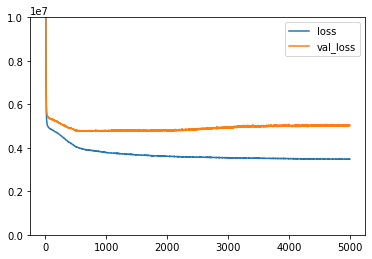

In [27]:
losses.plot()
plt.ylim(0,10000000)

## model ewaluation

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [29]:
predictions = model.predict(X_test)

In [30]:
mean_absolute_error(y_test,predictions)

1350.14250928041

In [31]:
np.sqrt(mean_squared_error(y_test,predictions))

2243.3263362259077

In [32]:
r2_score(y_test,predictions)

0.710698328898677

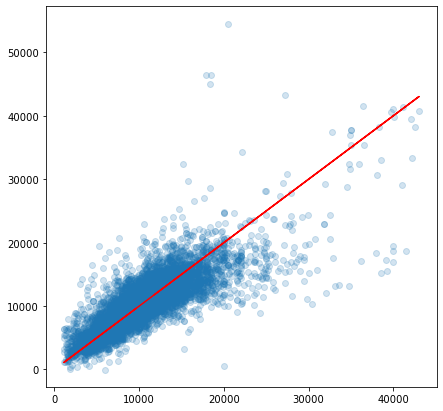

In [33]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [34]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

<AxesSubplot:ylabel='Count'>

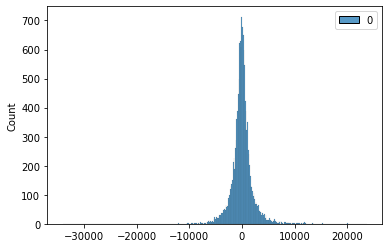

In [35]:
# plt.xlim(-200000,200000)

sns.histplot(errors)

In [36]:
predictions.reshape(y_test.shape[0])[:20]

array([11711.797 ,  6363.9263, 11991.918 , 12743.926 , 11252.657 ,
       11720.649 ,  7921.41  ,  5710.392 ,  6998.1997, 15860.561 ,
        9198.814 ,  4099.0854, 11390.213 ,  7736.8657,  6290.003 ,
        4113.644 ,  6910.2603,  9825.897 ,  5291.9614, 10009.516 ],
      dtype=float32)

In [37]:
y_test[:20]

array([ 9592.59259259,  6268.99028306,  8734.93975904,  9320.        ,
       10414.74654378, 10487.80487805,  7500.        ,  5295.0075643 ,
        5649.99365724, 14166.66666667,  8843.44528711,  4173.88565128,
       12253.39763262,  7989.49737434,  5478.80690738,  4128.35428786,
        6209.67741935,  8247.9338843 ,  4310.81081081, 11800.        ])

In [38]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

array([1.22092091, 1.01514374, 1.37286785, 1.36737401, 1.08045426,
       1.11755029, 1.05618802, 1.07844833, 1.23862081, 1.11956898,
       1.04018447, 0.982079  , 0.92955548, 0.96837953, 1.14806071,
       0.99643678, 1.11282113, 1.19131623, 1.22760234, 0.84826404])

## saving data

In [39]:
from datetime import datetime
from tensorflow.keras.models import load_model
timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")
model.save('models_ann\\' + '800_' + timestamp)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models_ann\800_2021-01-12--00-22\assets


In [40]:
import joblib
joblib.dump(scaler, 'scaler_800')

['scaler_800']